##Agglomerative Clustering pada Dataset Iris

Nama: Divia Shinta Sukarsaatmadja

NIM : 24060121140104

Lab : ML A1

###Import Libraries

In [1]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Kode tersebut melakukan impor library yang dibutuhkan untuk melakukan Agglomerative Clustering. Ini termasuk pengolahan data menggunakan NumPy dan Pandas, visualisasi dengan Matplotlib, serta penggunaan fungsi-fungsi clustering dari SciPy dan scikit-learn.

###Read Data

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Kode ini membaca dataset Iris dari URL yang diberikan ke dalam DataFrame menggunakan pandas. Dataset ini memiliki kolom-kolom seperti `sepal-length`, `sepal-width`, `petal-length`, `petal-width`, dan `class`. Data ini diambil dari UCI Machine Learning Repository. `dataset.head(5)` digunakan untuk menampilkan lima baris pertama dari dataset tersebut.

In [3]:
dataset.shape

(150, 5)

Kode `dataset.shape` digunakan untuk mengetahui ukuran dataset, yaitu jumlah baris dan kolom. Outputnya akan berupa tuple dengan dua angka, di mana angka pertama adalah jumlah baris (instances) dan angka kedua adalah jumlah kolom (features).

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Code `dataset.info()` digunakan untuk menampilkan informasi ringkas tentang dataset, termasuk jumlah entri, nama kolom, jumlah nilai non-null, dan tipe data setiap kolom. Itu memberikan gambaran cepat tentang struktur dataset.

In [5]:
# Menampilkan 10 data teratas
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Code tersebut digunakan untuk menampilkan 10 data teratas dari dataset.

###Data Cleaning

In [6]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", dataset.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
dataset = dataset.dropna()
# Mengatur ulang indeks setelah penghapusan baris
dataset = dataset.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran dataset setelah cleaning:", dataset.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
dataset.head(10)

Dimensi dataset sebelum cleaning: 750
Ukuran dataset setelah cleaning: 750


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Code tersebut digunakan untuk membersihkan dataset. Dimensi dataset sebelum dan sesudah proses pembersihan dicetak, dan 10 baris pertama dari dataset yang telah dibersihkan ditampilkan. Proses pembersihan ini melibatkan beberapa langkah:

1. **Mengubah Kolom Tertentu Menjadi Tipe Data Numerik**: Kolom-kolom seperti 'sepal-length', 'sepal-width', 'petal-length', dan 'petal-width' diubah menjadi tipe data numerik.

2. **Mengatasi Nilai Non-Numerik dengan NaN**: Selama konversi ke tipe data numerik, jika ada nilai non-numerik, nilai tersebut diubah menjadi NaN.

3. **Menghapus Baris yang Mengandung NaN**: Baris-baris yang mengandung setidaknya satu nilai NaN dihapus dari dataset.

4. **Mereset Indeks**: Setelah penghapusan baris, indeks dataset diatur ulang agar kontinu.

Hasil pembersihan ditampilkan dalam bentuk dimensi dataset dan 10 baris pertama dari dataset yang telah dibersihkan.

###Feature Selection

In [7]:
# Feature Selection
featureset = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
featureset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Code di atas digunakan untuk melakukan seleksi fitur pada dataset. Kolom-kolom yang dipilih untuk fitur tersebut adalah 'sepal-length', 'sepal-width', 'petal-length', dan 'petal-width'. Hasilnya, ditampilkan 10 baris pertama dari subset dataset yang hanya terdiri dari fitur-fitur tersebut. Proses ini membantu untuk fokus pada fitur-fitur tertentu yang dianggap relevan untuk analisis atau pemodelan lebih lanjut.

###Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

Code di atas digunakan untuk melakukan normalisasi menggunakan Min-Max Scaling pada fitur-fitur yang telah dipilih sebelumnya. Berikut adalah penjelasan langkah-langkahnya:

1. **Import MinMaxScaler:** Mengimport kelas `MinMaxScaler` dari modul `sklearn.preprocessing`.

2. **Persiapan Data untuk Normalisasi:**
   - Variabel `x` berisi nilai dari fitur-fitur yang akan dinormalisasi, diambil dari `featureset.values`.
   
3. **Inisialisasi MinMaxScaler:**
   - Membuat objek `min_max_scaler` sebagai instance dari `MinMaxScaler`.

4. **Normalisasi:**
   - Menggunakan metode `fit_transform` pada objek `min_max_scaler` untuk mengubah nilai variabel dalam rentang 0 hingga 1.
   - Hasil normalisasi disimpan dalam variabel `feature_mtx`.

5. **Menampilkan Hasil Normalisasi:**
   - Menampilkan lima baris pertama dari hasil normalisasi dengan `feature_mtx[0:5]`.

Normalisasi bertujuan untuk mengubah nilai-nilai variabel sehingga mereka berada dalam rentang yang seragam, dalam hal ini antara 0 dan 1. Hal ini dapat membantu dalam beberapa algoritma machine learning yang sensitive terhadap skala, serta memudahkan interpretasi nilai-nilai tersebut.

###Clustering With Scipy

In [9]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-9-fb67c369474a>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Code di atas digunakan untuk menghitung matriks jarak antar pasangan data dalam `feature_mtx` menggunakan jarak Euclidean. Berikut adalah penjelasan langkah-langkahnya:

1. **Import Modul dan Library:**
   - Mengimport modul `scipy`.
   - Mengimport modul `pylab`.
   - Mengimport modul `scipy.cluster.hierarchy`.

2. **Inisialisasi Variabel:**
   - `leng`: Mendapatkan jumlah baris dalam `feature_mtx` menggunakan `feature_mtx.shape[0]`.
   - `D`: Inisialisasi matriks jarak `D` dengan nol menggunakan `scipy.zeros([leng, leng])`.

3. **Perhitungan Jarak Euclidean:**
   - Melakukan nested loop untuk mengisi matriks jarak `D`.
   - Pada setiap iterasi, menggunakan `scipy.spatial.distance.euclidean` untuk menghitung jarak Euclidean antara dua baris data, yaitu antara `feature_mtx[i]` dan `feature_mtx[j]`.

Matriks jarak ini kemudian akan digunakan dalam proses agglomerative clustering untuk membentuk dendrogram. Proses ini melibatkan pengelompokan berurutan (hierarchical) data berdasarkan jarak antara mereka.

####Complete Linkage

In [10]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-10-1190c8367043>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Code di atas digunakan untuk melakukan agglomerative clustering menggunakan metode Complete Linkage pada matriks jarak `D` yang telah dihitung sebelumnya.

- `hierarchy.linkage(D, 'complete')`: Membentuk hierarchical clustering dengan menggunakan metode Complete Linkage.
- `D` adalah matriks jarak yang telah dihitung sebelumnya.
- Hasil dari proses ini adalah matriks linkage `Z`, yang menyimpan informasi tentang pengelompokan hierarkis.

In [11]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 4, 6, 4, 5, 4, 6, 5, 4, 6, 4, 6, 4,
       4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 9, 4, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       6, 6, 6, 4, 6, 5, 6, 6, 6, 4, 5, 6, 8, 4, 8, 9, 9, 7, 4, 8, 9, 7,
       9, 9, 9, 4, 9, 9, 9, 7, 7, 4, 8, 4, 7, 4, 9, 8, 4, 4, 9, 8, 8, 7,
       9, 4, 4, 7, 8, 9, 4, 9, 8, 9, 4, 8, 8, 9, 9, 9, 9, 4], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Complete Linkage. Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `max_d = 3`: Menentukan batas jarak maksimum untuk membentuk cluster. Jarak antar elemen dalam cluster tidak boleh melebihi nilai `max_d`.
- `clusters = fcluster(Z, max_d, criterion='distance')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jarak (`criterion='distance'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

In [12]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 5, 2, 5, 5, 5, 4, 2, 5, 5, 4,
       5, 5, 5, 2, 5, 5, 5, 4, 4, 2, 5, 2, 4, 2, 5, 5, 2, 2, 5, 5, 5, 4,
       5, 2, 2, 4, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Complete Linkage, namun kali ini dengan kriteria jumlah cluster yang diinginkan (`criterion='maxclust'`). Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `k = 5`: Menentukan jumlah klaster yang diinginkan.
- `clusters = fcluster(Z, k, criterion='maxclust')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jumlah klaster (`criterion='maxclust'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

#####Plotting Dendogram

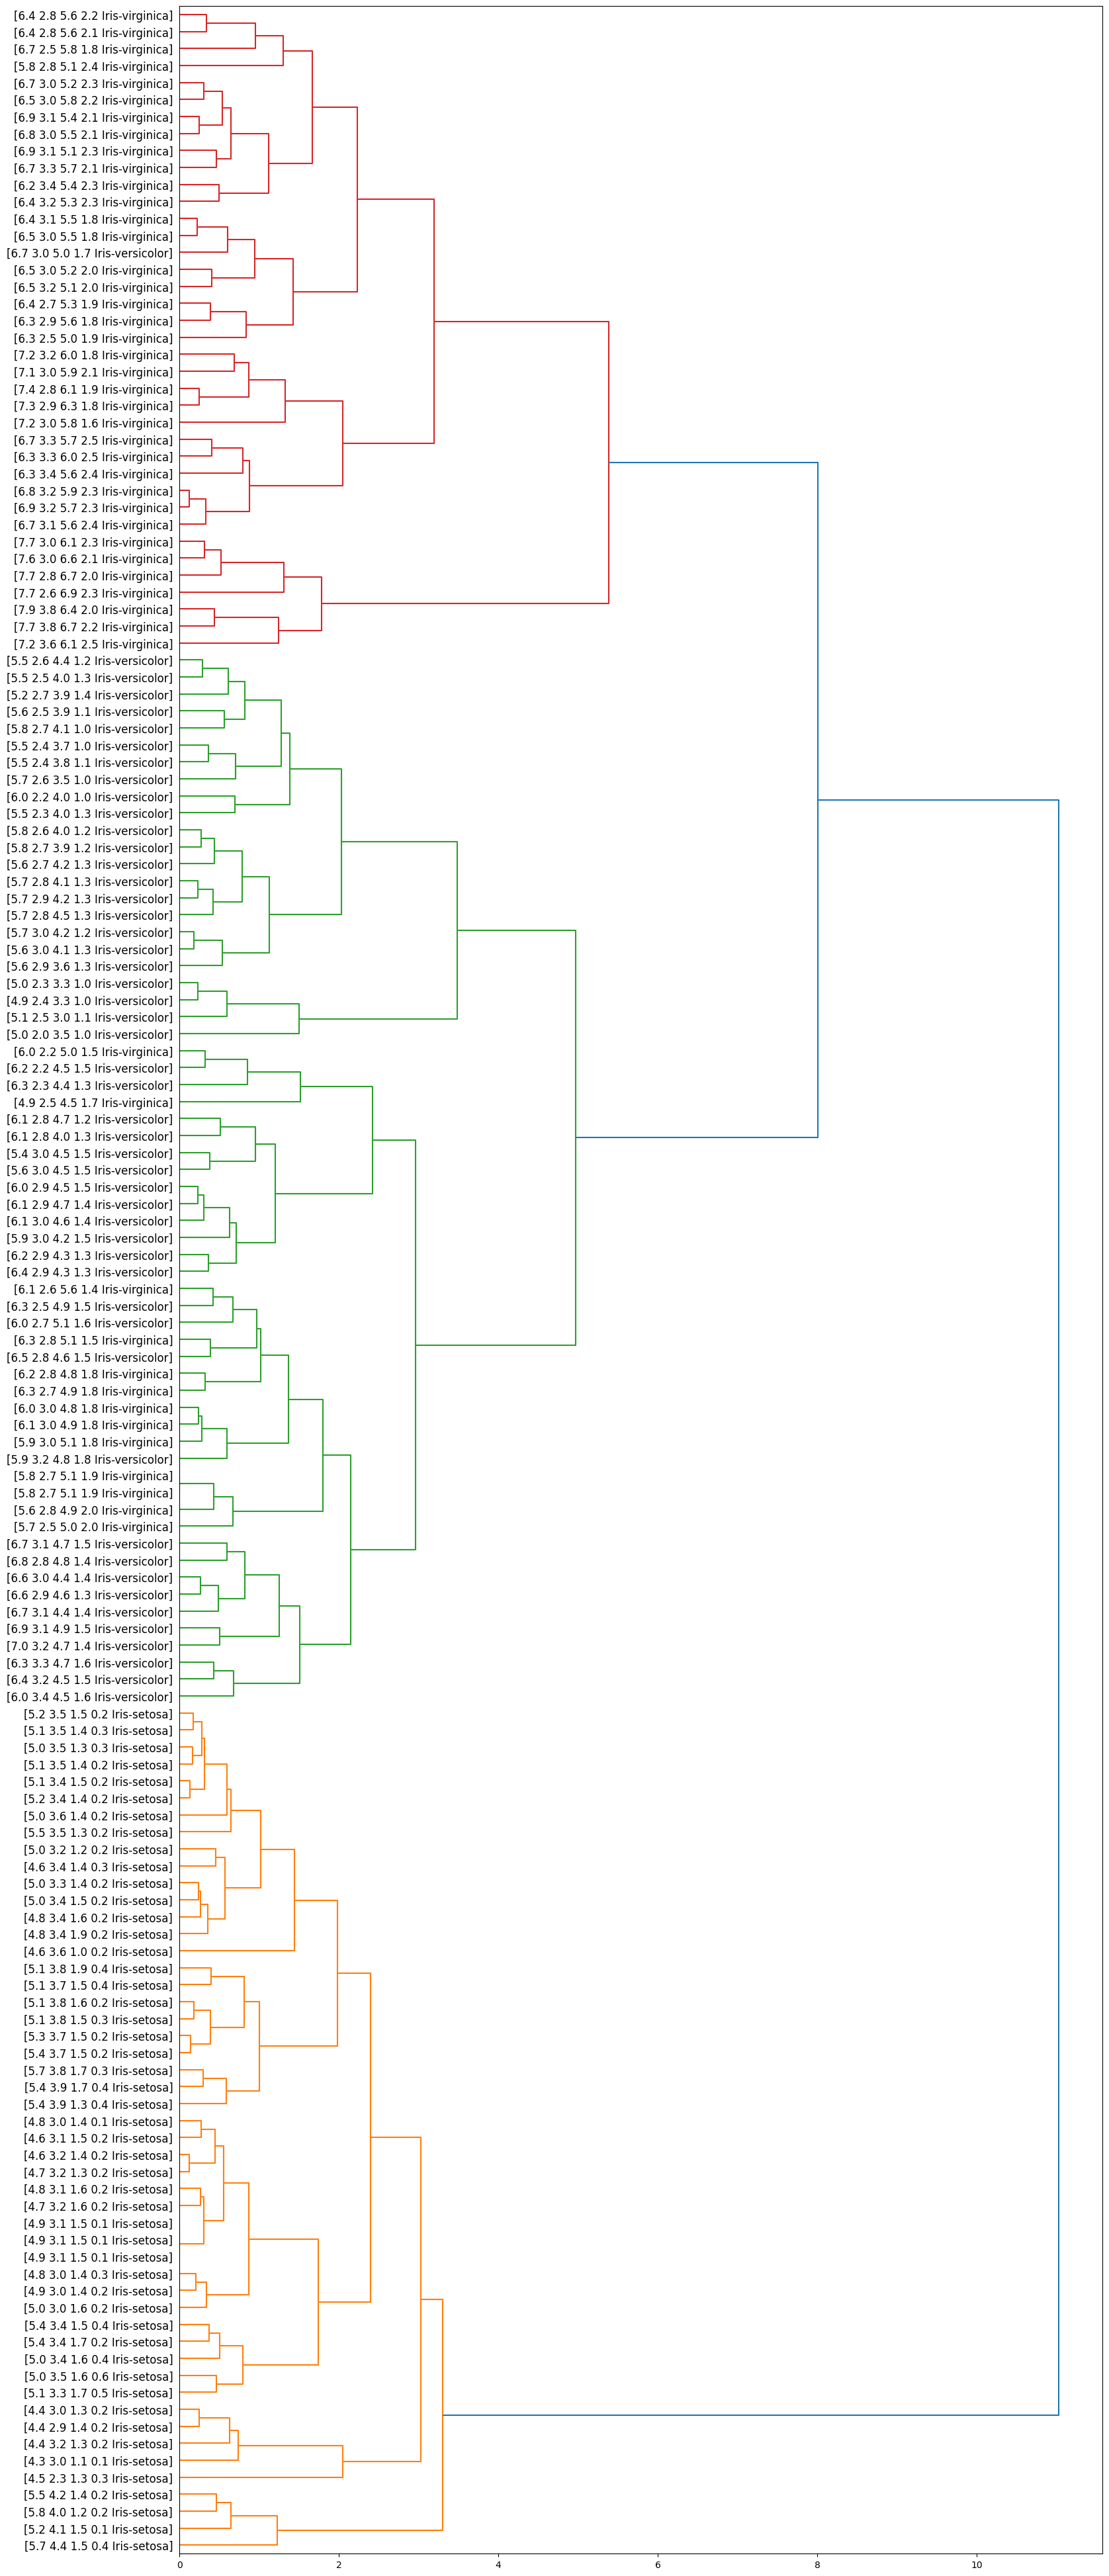

In [13]:
# Complete Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s %s %s %s]' % (dataset['sepal-length'][id], dataset['sepal-width'][id],
                                 dataset['petal-length'][id], dataset['petal-width'][id],
                                 dataset['class'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Code di atas digunakan untuk membuat dendrogram berdasarkan hasil agglomerative clustering dengan metode Complete Linkage. Penjelasan singkat:

- `fig = pylab.figure(figsize=(18,50))`: Membuat objek gambar (figure) dengan ukuran 18x50 inch.
- `def llf(id): ...`: Membuat fungsi `llf` yang memberikan label pada leaf (daun) dendrogram. Fungsi ini menggunakan kolom 'manufact', 'model', dan 'type' dari dataset `dataset` untuk memberikan label pada setiap leaf.
- `dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')`: Membuat dendrogram berdasarkan matriks linkage `Z`. Parameter `leaf_label_func` menggunakan fungsi `llf` yang telah dibuat sebelumnya. `orientation='right'` mengatur orientasi dendrogram menjadi horizontal.

Visualisasi dendrogram menggunakan code di atas memberikan representasi hierarki dari pengelompokan data. Setiap daun di dendrogram mewakili satu sampel atau entitas dalam dataset, dan setiap cabang menunjukkan pengelompokan atau penyatuan sampel ke dalam kelompok yang lebih besar.

Dalam konteks ini, label setiap daun mencakup informasi sepal-length, sepal-width, petal-length, petal-width, dan class dari masing-masing sampel. Dendrogram dapat membantu dalam memahami tingkat kemiripan antara sampel dan struktur hierarki dalam data. Dengan menyusun daun dari kiri ke kanan, kita dapat melihat bagaimana sampel bersatu ke dalam kelompok yang lebih besar seiring dengan peningkatan tingkat kesamaan antara mereka.

####Single Linkage

In [14]:
# Single Linkage
Z = hierarchy.linkage(D, 'single')

<ipython-input-14-b2e3cff2d09d>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


Code di atas digunakan untuk melakukan agglomerative clustering menggunakan metode Single Linkage pada matriks jarak `D` yang telah dihitung sebelumnya.

- `hierarchy.linkage(D, 'single')`: Membentuk hierarchical clustering dengan menggunakan metode Single Linkage.
- `D` adalah matriks jarak yang telah dihitung sebelumnya.
- Hasil dari proses ini adalah matriks linkage `Z`, yang menyimpan informasi tentang pengelompokan hierarkis.

In [15]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Single Linkage


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Single Linkage. Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `max_d = 3`: Menentukan batas jarak maksimum untuk membentuk cluster. Jarak antar elemen dalam cluster tidak boleh melebihi nilai `max_d`.
- `clusters = fcluster(Z, max_d, criterion='distance')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jarak (`criterion='distance'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

In [16]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Single Linkage


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Single Linkage, namun kali ini dengan kriteria jumlah cluster yang diinginkan (`criterion='maxclust'`). Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `k = 5`: Menentukan jumlah klaster yang diinginkan.
- `clusters = fcluster(Z, k, criterion='maxclust')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jumlah klaster (`criterion='maxclust'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

#####Plotting Dendogram

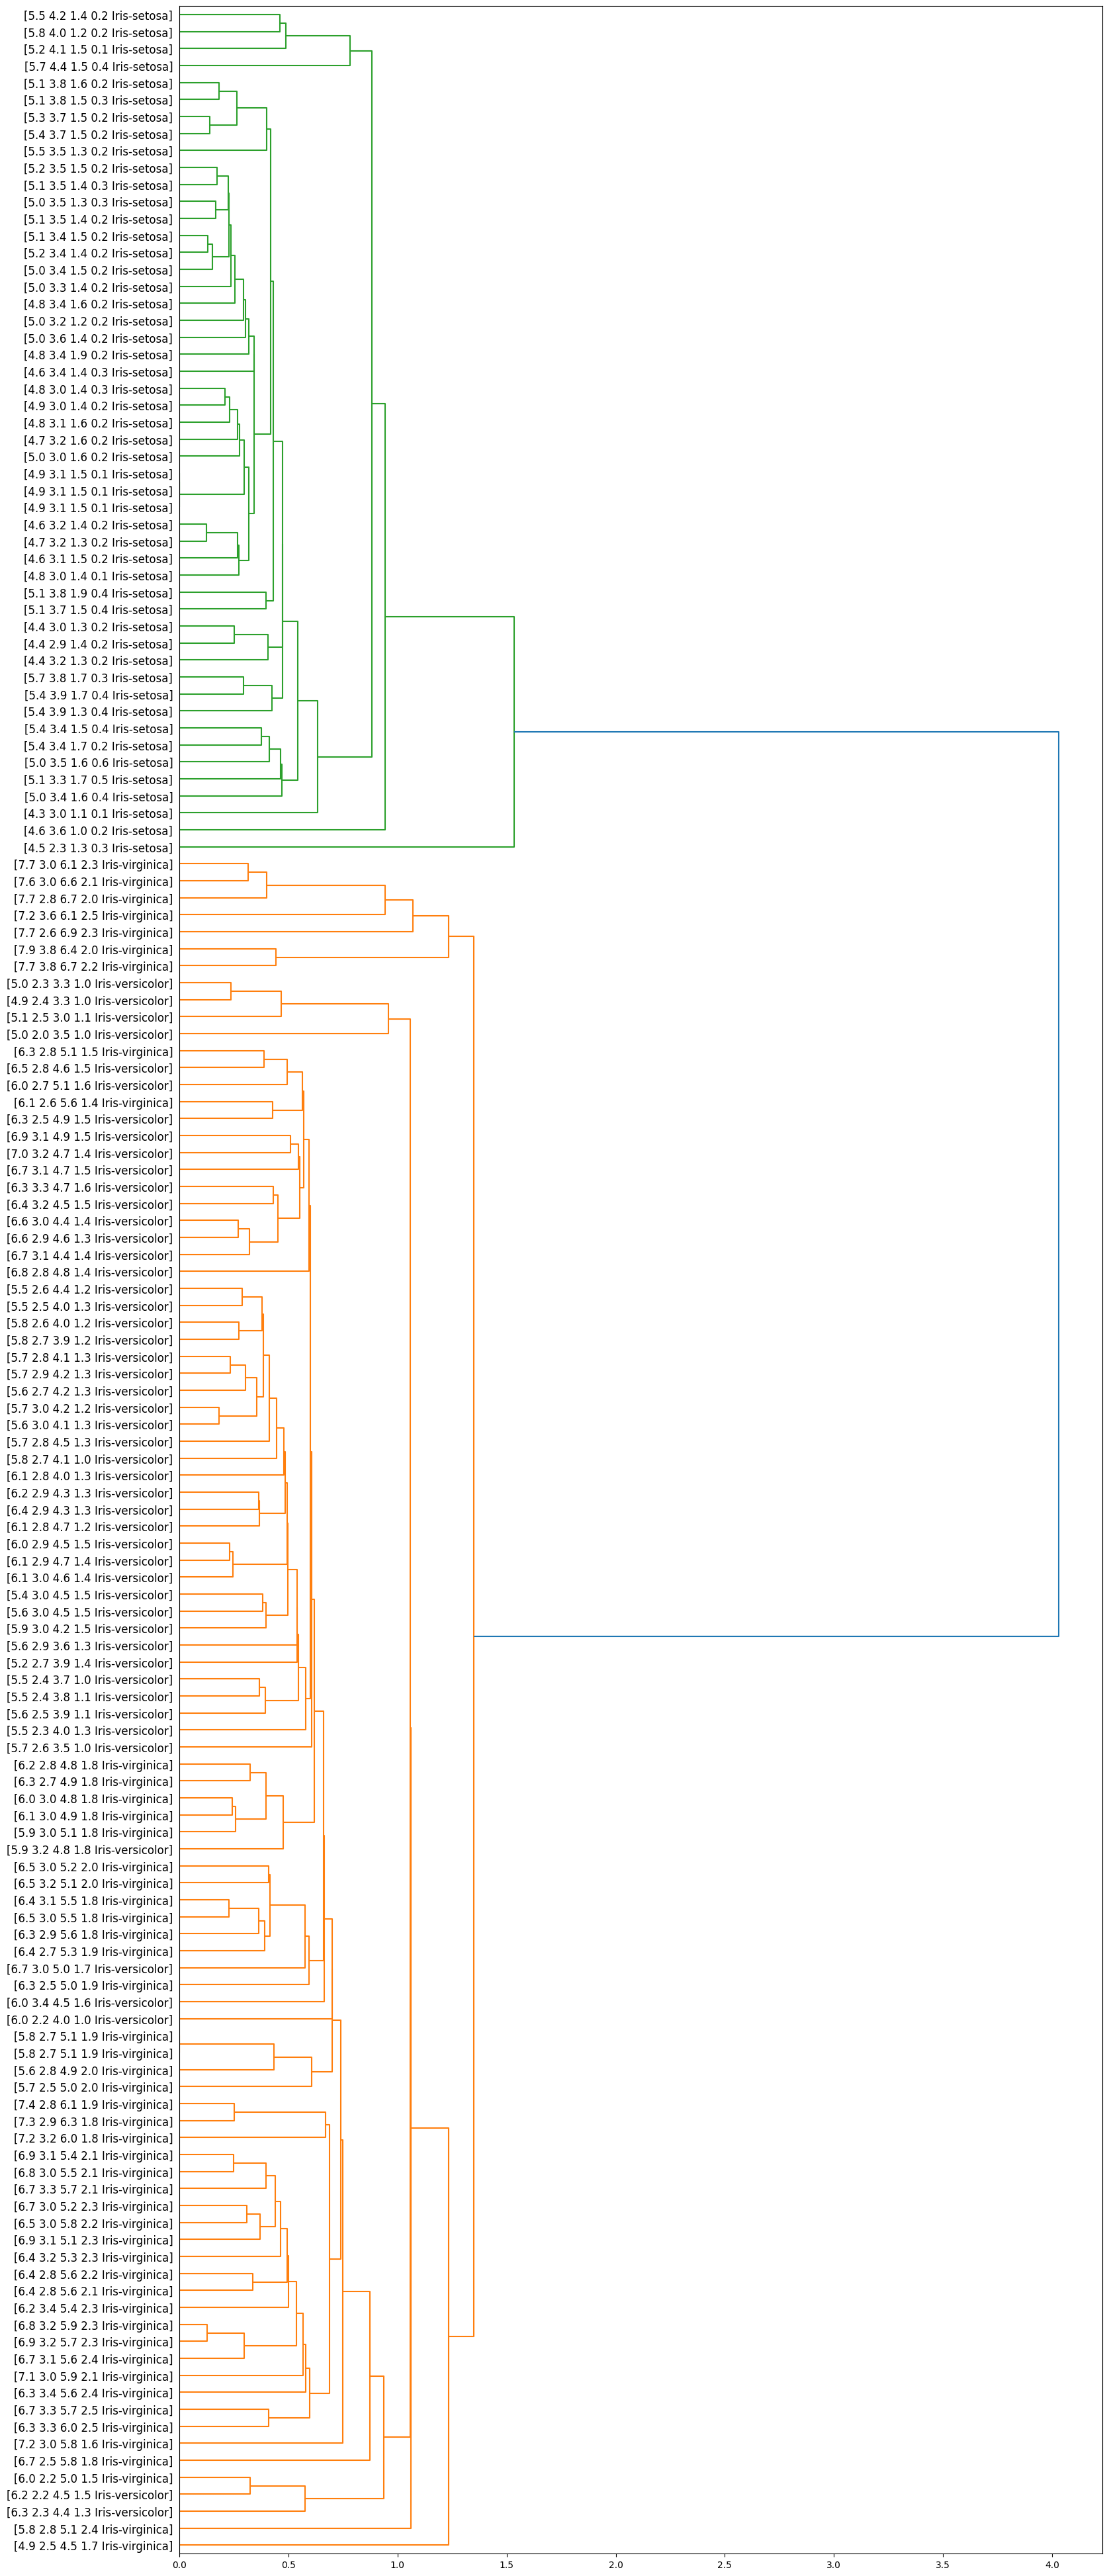

In [17]:
# Single Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s %s %s %s]' % (dataset['sepal-length'][id], dataset['sepal-width'][id],
                                 dataset['petal-length'][id], dataset['petal-width'][id],
                                 dataset['class'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Code di atas digunakan untuk membuat dendrogram berdasarkan hasil agglomerative clustering dengan metode Single Linkage. Penjelasan singkat:

- `fig = pylab.figure(figsize=(18,50))`: Membuat objek gambar (figure) dengan ukuran 18x50 inch.
- `def llf(id): ...`: Membuat fungsi `llf` yang memberikan label pada leaf (daun) dendrogram. Fungsi ini menggunakan kolom 'manufact', 'model', dan 'type' dari dataset `dataset` untuk memberikan label pada setiap leaf.
- `dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')`: Membuat dendrogram berdasarkan matriks linkage `Z`. Parameter `leaf_label_func` menggunakan fungsi `llf` yang telah dibuat sebelumnya. `orientation='right'` mengatur orientasi dendrogram menjadi horizontal.

Visualisasi dendrogram menggunakan code di atas memberikan representasi hierarki dari pengelompokan data. Setiap daun di dendrogram mewakili satu sampel atau entitas dalam dataset, dan setiap cabang menunjukkan pengelompokan atau penyatuan sampel ke dalam kelompok yang lebih besar.

Dalam konteks ini, label setiap daun mencakup informasi sepal-length, sepal-width, petal-length, petal-width, dan class dari masing-masing sampel. Dendrogram dapat membantu dalam memahami tingkat kemiripan antara sampel dan struktur hierarki dalam data. Dengan menyusun daun dari kiri ke kanan, kita dapat melihat bagaimana sampel bersatu ke dalam kelompok yang lebih besar seiring dengan peningkatan tingkat kesamaan antara mereka.

####Average Linkage

In [18]:
# Average Linkage
Z = hierarchy.linkage(D, 'average')

<ipython-input-18-8b2002298af9>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


Code di atas digunakan untuk melakukan agglomerative clustering menggunakan metode Average Linkage pada matriks jarak `D` yang telah dihitung sebelumnya.

- `hierarchy.linkage(D, 'average')`: Membentuk hierarchical clustering dengan menggunakan metode Average Linkage.
- `D` adalah matriks jarak yang telah dihitung sebelumnya.
- Hasil dari proses ini adalah matriks linkage `Z`, yang menyimpan informasi tentang pengelompokan hierarkis.

In [19]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Average Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Average Linkage. Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `max_d = 3`: Menentukan batas jarak maksimum untuk membentuk cluster. Jarak antar elemen dalam cluster tidak boleh melebihi nilai `max_d`.
- `clusters = fcluster(Z, max_d, criterion='distance')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jarak (`criterion='distance'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

In [20]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Average Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 5, 4,
       4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 4, 2, 4, 2, 3, 4, 2, 2, 3,
       4, 4, 2, 4, 2, 2, 4, 3, 3, 4, 2, 4, 3, 4, 2, 2, 4, 4, 2, 2, 2, 3,
       2, 4, 4, 3, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

Code di atas digunakan untuk menentukan jumlah cluster berdasarkan hasil agglomerative clustering dengan metode Average Linkage, namun kali ini dengan kriteria jumlah cluster yang diinginkan (`criterion='maxclust'`). Penjelasan singkat:

- `from scipy.cluster.hierarchy import fcluster`: Mengimport fungsi `fcluster` dari modul `scipy.cluster.hierarchy`.
- `k = 5`: Menentukan jumlah klaster yang diinginkan.
- `clusters = fcluster(Z, k, criterion='maxclust')`: Menggunakan fungsi `fcluster` untuk menentukan cluster berdasarkan matriks linkage `Z` dengan kriteria jumlah klaster (`criterion='maxclust'`). Hasilnya adalah array yang menyimpan label klaster untuk setiap data point.

#####Plotting Dendogram

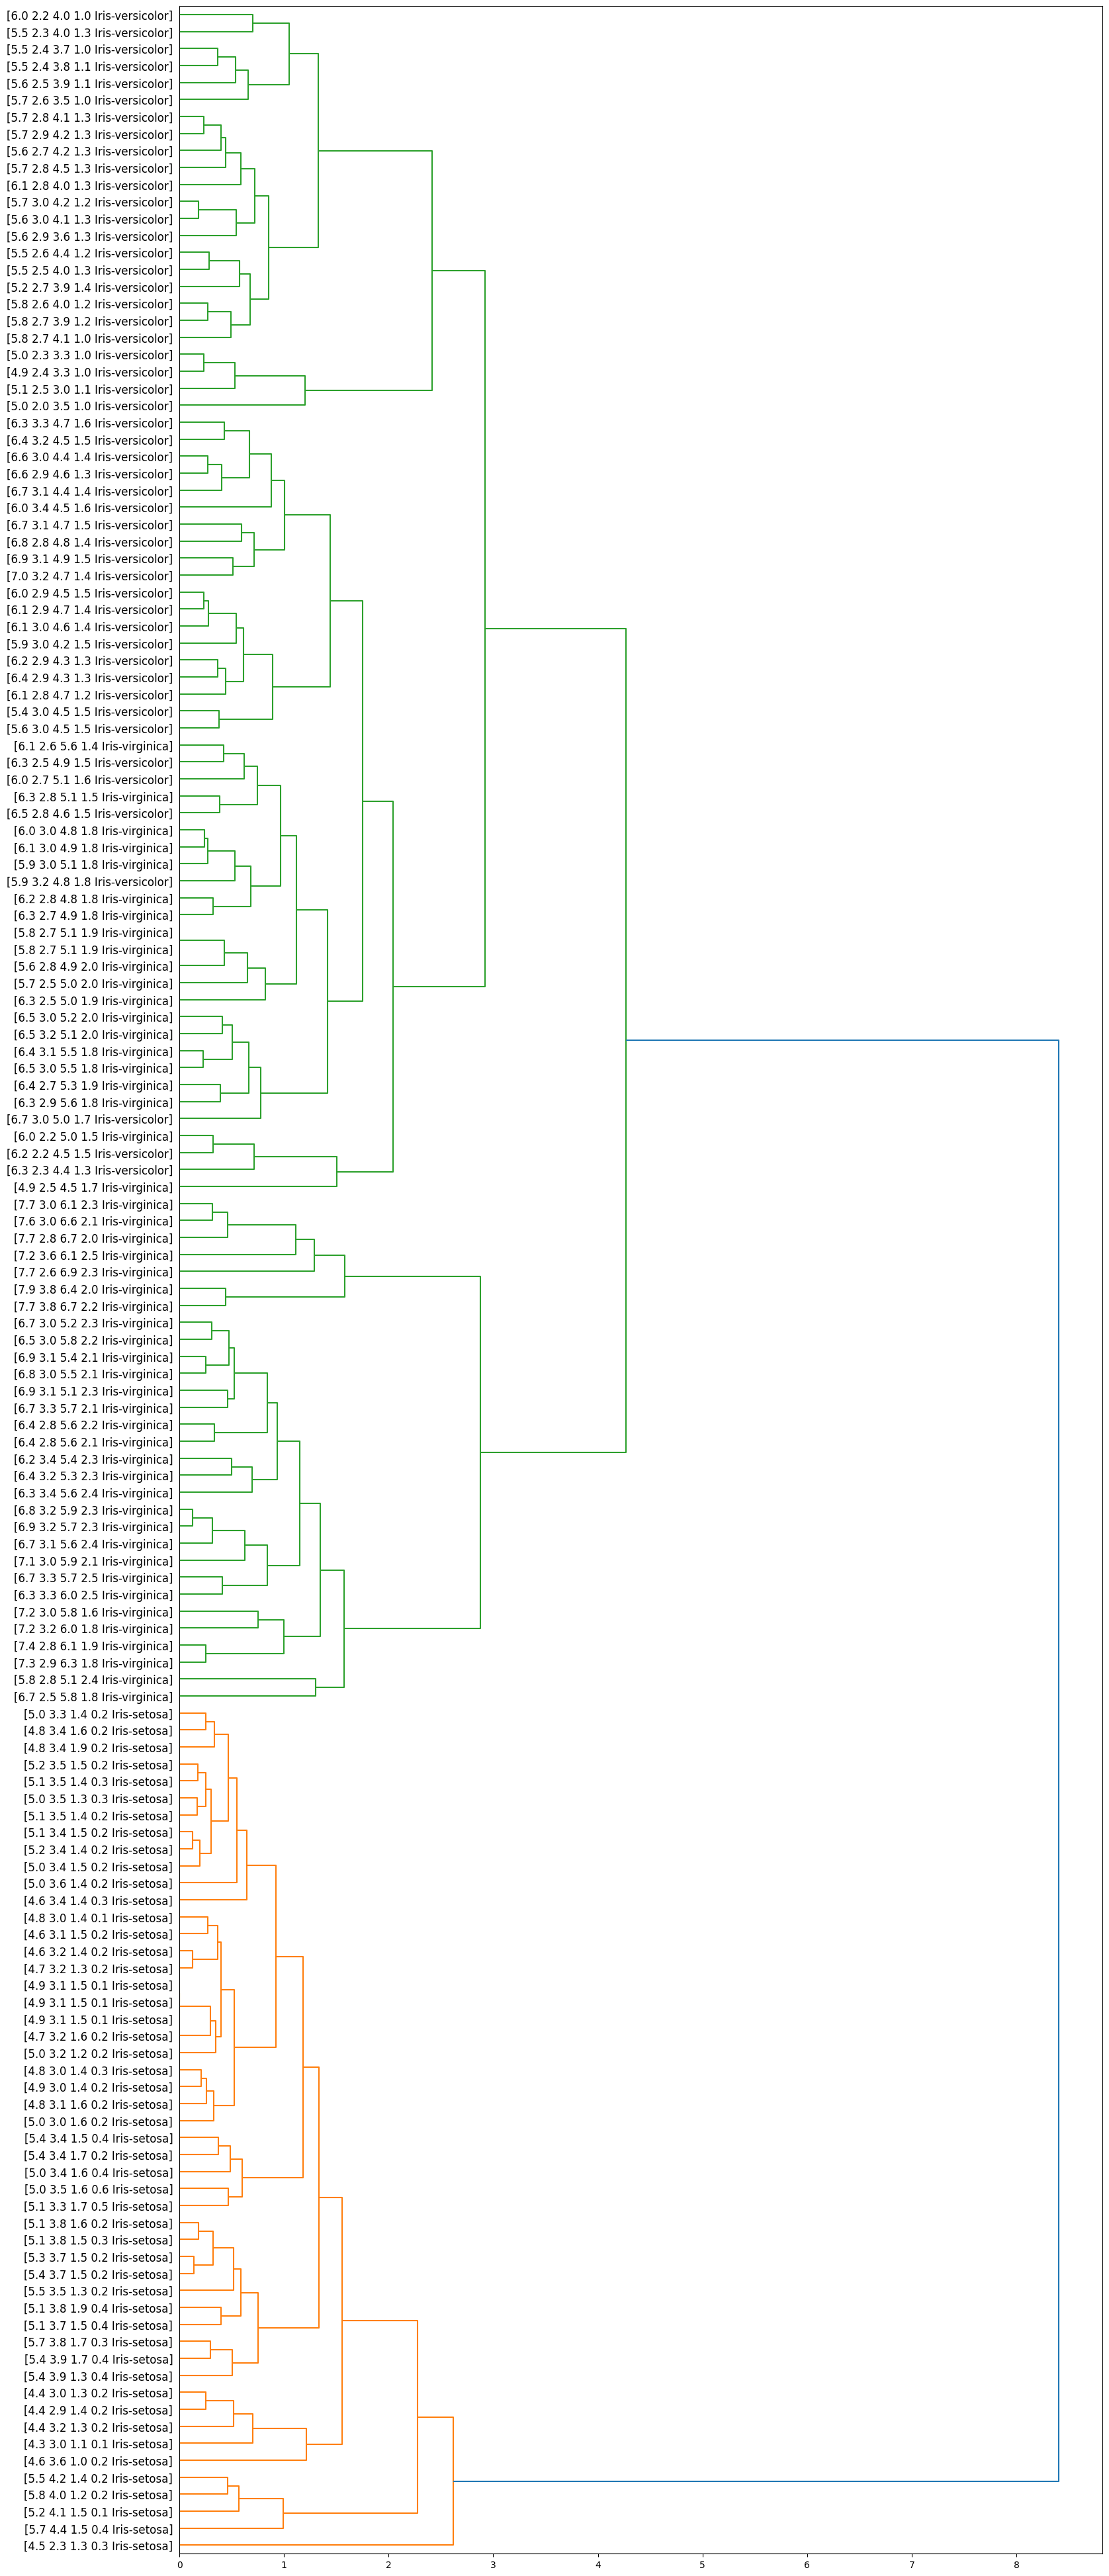

In [21]:
# Average Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s %s %s %s]' % (dataset['sepal-length'][id], dataset['sepal-width'][id],
                                 dataset['petal-length'][id], dataset['petal-width'][id],
                                 dataset['class'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Code di atas digunakan untuk membuat dendrogram berdasarkan hasil agglomerative clustering dengan metode Average Linkage. Penjelasan singkat:

- `fig = pylab.figure(figsize=(18,50))`: Membuat objek gambar (figure) dengan ukuran 18x50 inch.
- `def llf(id): ...`: Membuat fungsi `llf` yang memberikan label pada leaf (daun) dendrogram. Fungsi ini menggunakan kolom 'manufact', 'model', dan 'type' dari dataset `dataset` untuk memberikan label pada setiap leaf.
- `dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')`: Membuat dendrogram berdasarkan matriks linkage `Z`. Parameter `leaf_label_func` menggunakan fungsi `llf` yang telah dibuat sebelumnya. `orientation='right'` mengatur orientasi dendrogram menjadi horizontal.

Visualisasi dendrogram menggunakan code di atas memberikan representasi hierarki dari pengelompokan data. Setiap daun di dendrogram mewakili satu sampel atau entitas dalam dataset, dan setiap cabang menunjukkan pengelompokan atau penyatuan sampel ke dalam kelompok yang lebih besar.

Dalam konteks ini, label setiap daun mencakup informasi sepal-length, sepal-width, petal-length, petal-width, dan class dari masing-masing sampel. Dendrogram dapat membantu dalam memahami tingkat kemiripan antara sampel dan struktur hierarki dalam data. Dengan menyusun daun dari kiri ke kanan, kita dapat melihat bagaimana sampel bersatu ke dalam kelompok yang lebih besar seiring dengan peningkatan tingkat kesamaan antara mereka.

###Clustering With Scikit-Learn

In [22]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


Code tersebut menggunakan fungsi `distance_matrix` dari modul `sklearn.metrics.pairwise` untuk menghitung matriks jarak antara setiap pasangan data dalam `feature_mtx`. Matriks jarak ini mencerminkan seberapa jauh atau dekat setiap dua data dalam ruang fitur. Hasilnya adalah representasi numerik dari tingkat kesamaan atau perbedaan antara data-data tersebut. Matriks jarak ini nantinya dapat digunakan dalam proses clustering untuk mengelompokkan data yang memiliki jarak yang lebih dekat satu sama lain.

####Complete Linkage

In [23]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 5, 0, 5, 5, 5, 1, 4, 1, 0, 1,
       5, 0, 5, 0, 0, 5, 5, 1, 1, 4, 5, 0, 1, 0, 5, 1, 0, 0, 5, 1, 1, 1,
       5, 0, 0, 1, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0])

Code di atas menggunakan algoritma agglomerative clustering dengan complete linkage untuk membentuk 6 klaster dari data yang sudah dinormalisasi (`feature_mtx`). Hasil klaster untuk setiap sampel akan disimpan dalam atribut `labels_` dari objek `AgglomerativeClustering`. Klaster ini dapat digunakan untuk analisis lebih lanjut atau visualisasi hasil clustering.

In [24]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame dataset
dataset['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,3
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2


Code di atas menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame `dataset` yang berisi hasil klaster dari setiap sampel. Dengan menampilkan lima baris pertama dari DataFrame, kita dapat melihat hasil penambahan kolom klaster ini ke dalam data.

#####Scatter Plot

<ipython-input-25-00085a270b61>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)


Text(0, 0.5, 'sepal-width')

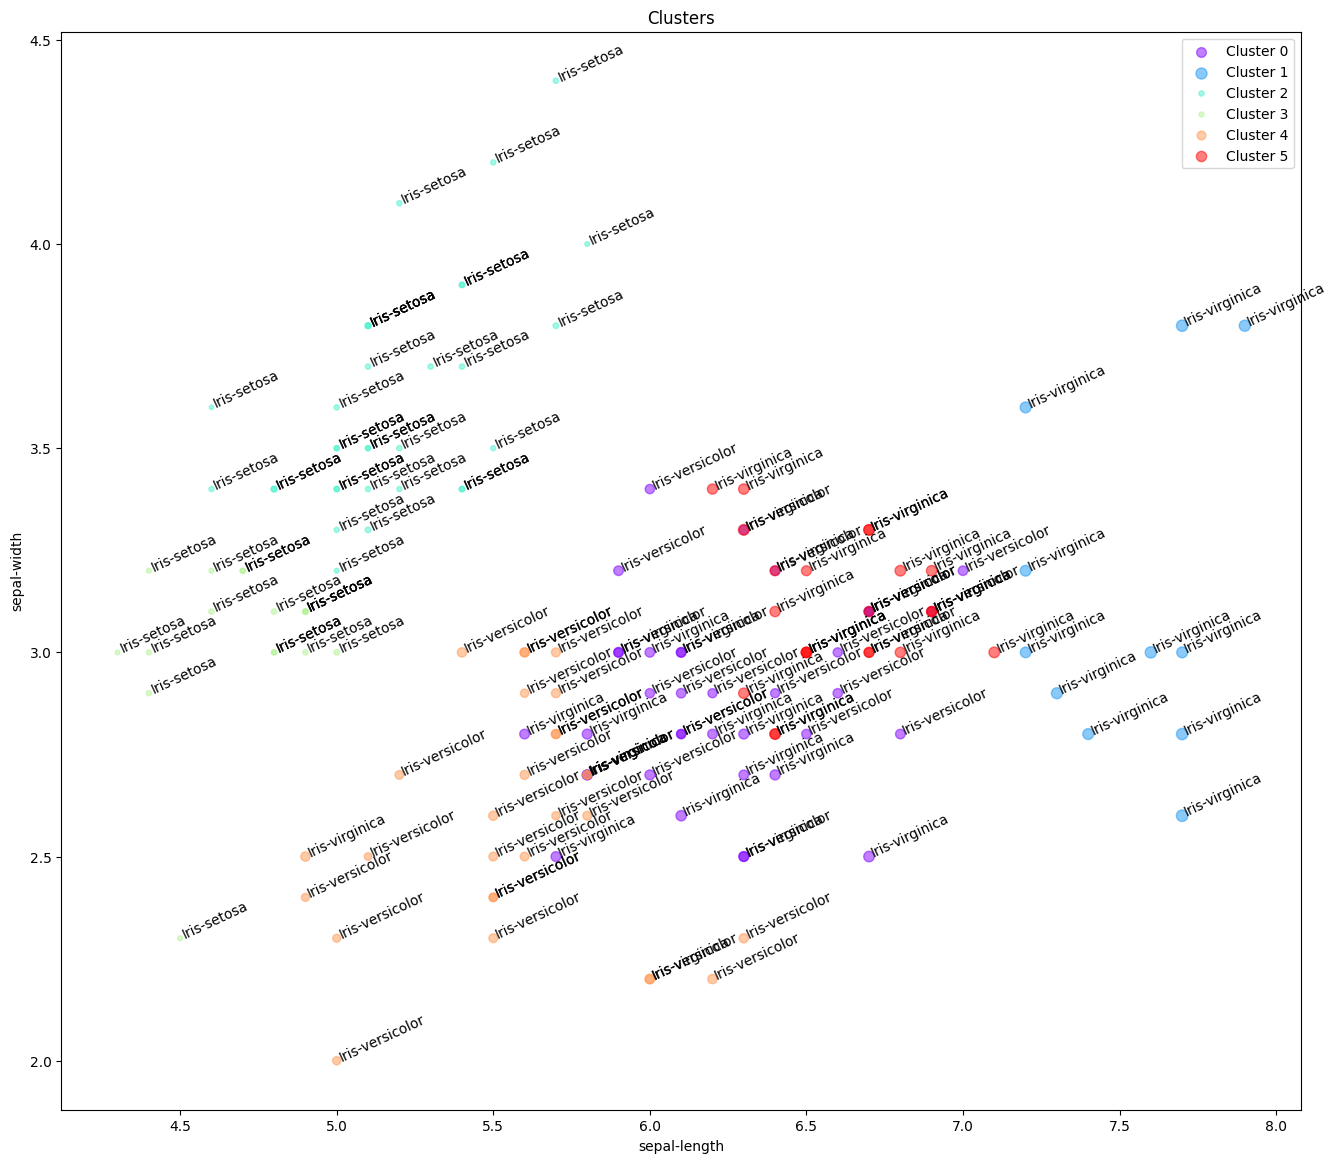

In [25]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset.cluster_ == label]
    for index, row in subset.iterrows():
        plt.text(row['sepal-length'], row['sepal-width'], str(row['class']), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Code di atas membuat visualisasi scatter plot untuk klaster yang dihasilkan dari hasil clustering menggunakan Agglomerative Clustering. Setiap klaster ditandai dengan warna yang berbeda, dan pada setiap titik data, kita menampilkan model mobilnya. Legenda dan label grafik juga disusun untuk memberikan konteks terhadap visualisasi tersebut.

In [26]:
# Menghitung tipe di setiap cluster
dataset.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-versicolor    22
          Iris-virginica     15
1         Iris-virginica     11
2         Iris-setosa        33
3         Iris-setosa        17
4         Iris-versicolor    27
          Iris-virginica      2
5         Iris-versicolor     1
          Iris-virginica     22
Name: cluster_, dtype: int64

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung jumlah kelas iris di setiap klaster. Ini memberikan informasi tentang distribusi kelas iris di masing-masing klaster hasil clustering.

In [27]:
# Karakteristik masing-masing cluster
agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()
agg_iris

<ipython-input-27-4c8b9e7cb13a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-versicolor      6.345455     2.977273      4.586364     1.450000
         Iris-virginica       6.066667     2.740000      5.100000     1.846667
1        Iris-virginica       7.509091     3.136364      6.336364     2.045455
2        Iris-setosa          5.172727     3.618182      1.487879     0.275758
3        Iris-setosa          4.682353     3.029412      1.417647     0.182353
4        Iris-versicolor      5.574074     2.592593      3.966667     1.211111
         Iris-virginica       5.450000     2.350000      4.750000     1.600000
5        Iris-versicolor      6.700000     3.000000      5.000000     1.700000
         Iris-virginica       6.586364     3.109091      5.540909     2.177273

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung rata-rata dari beberapa atribut ('sepal-length', 'sepal-width', 'petal-length', 'petal-width') di setiap klaster dan kelas iris. Ini memberikan gambaran karakteristik masing-masing klaster hasil clustering untuk setiap kelas iris.

#####Plotting Dendogram

<ipython-input-28-634b65063aa5>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))


Text(0, 0.5, 'sepal-width')

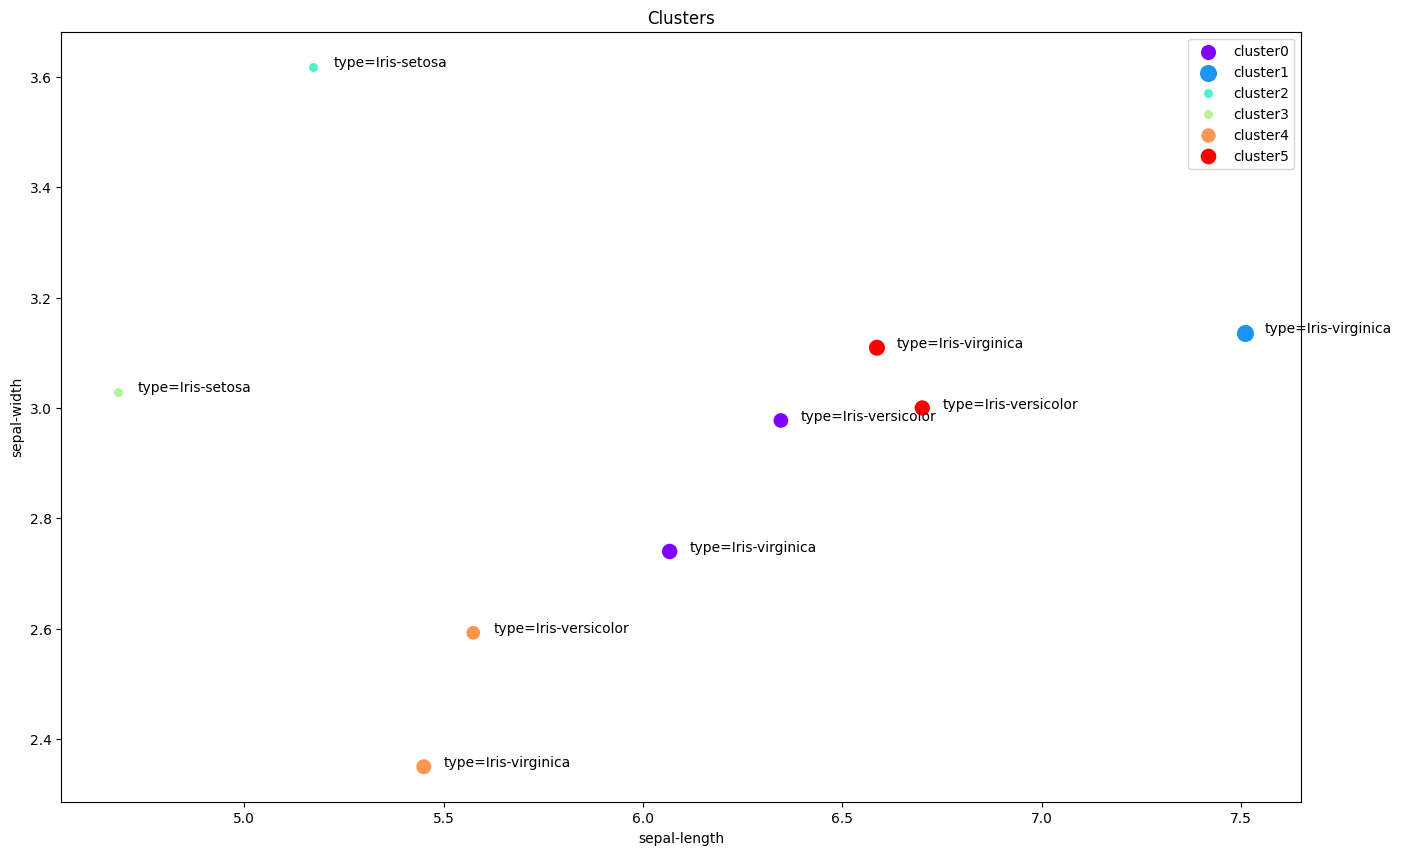

In [28]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i]['sepal-length'] + 0.05, subset.loc[i]['sepal-width'], 'type=' + str(i))
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Visualisasi yang dihasilkan dari code tersebut memperlihatkan bagaimana data pada dataset iris terdistribusi dalam dimensi 'sepal-length' dan 'sepal-width' setelah proses clustering menggunakan complete linkage. Beberapa poin penting dari visualisasi ini:

1. **Warna Klaster:**
   - Setiap klaster ditampilkan dengan warna yang berbeda. Warna klaster dihasilkan dari pemetaan ke dalam ruang warna pelangi menggunakan `cm.rainbow`.

2. **Marker dan Ukuran:**
   - Setiap titik data (bunga iris) dalam klaster ditandai dengan marker scatter plot.
   - Ukuran marker (`s`) ditentukan oleh nilai 'petal-length' yang telah diubah skala. Ini dapat memberikan informasi visual tentang karakteristik 'petal-length' untuk setiap titik.

3. **Teks pada Titik Data:**
   - Teks ditambahkan ke setiap titik data, menunjukkan tipe data yang bersesuaian.
   - Teks ini berguna untuk identifikasi dan interpretasi data pada plot.

4. **Legenda:**
   - Legenda ditambahkan untuk menyajikan informasi tentang warna yang mewakili setiap klaster.

5. **Judul dan Label Sumbu:**
   - Grafik dilengkapi dengan judul ("Clusters") dan label sumbu x ("sepal-length") serta label sumbu y ("sepal-width").

Visualisasi ini membantu dalam memahami bagaimana data terorganisir setelah dilakukan clustering dengan menggunakan metode complete linkage pada atribut 'sepal-length' dan 'sepal-width'. Klaster yang berbeda tergambar dengan warna yang berbeda, dan pola distribusi dapat memberikan wawasan tentang kemiripan antar data dalam klaster tersebut.

####Single Linkage

In [29]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Code di atas menggunakan algoritma agglomerative clustering dengan single linkage untuk membentuk 6 klaster dari data yang sudah dinormalisasi (`feature_mtx`). Hasil klaster untuk setiap sampel akan disimpan dalam atribut `labels_` dari objek `AgglomerativeClustering`. Klaster ini dapat digunakan untuk analisis lebih lanjut atau visualisasi hasil clustering.

In [30]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame dataset
dataset['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


Code di atas menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame `dataset` yang berisi hasil klaster dari setiap sampel. Dengan menampilkan lima baris pertama dari DataFrame, kita dapat melihat hasil penambahan kolom klaster ini ke dalam data.

#####Scatter Plot

<ipython-input-31-00085a270b61>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)


Text(0, 0.5, 'sepal-width')

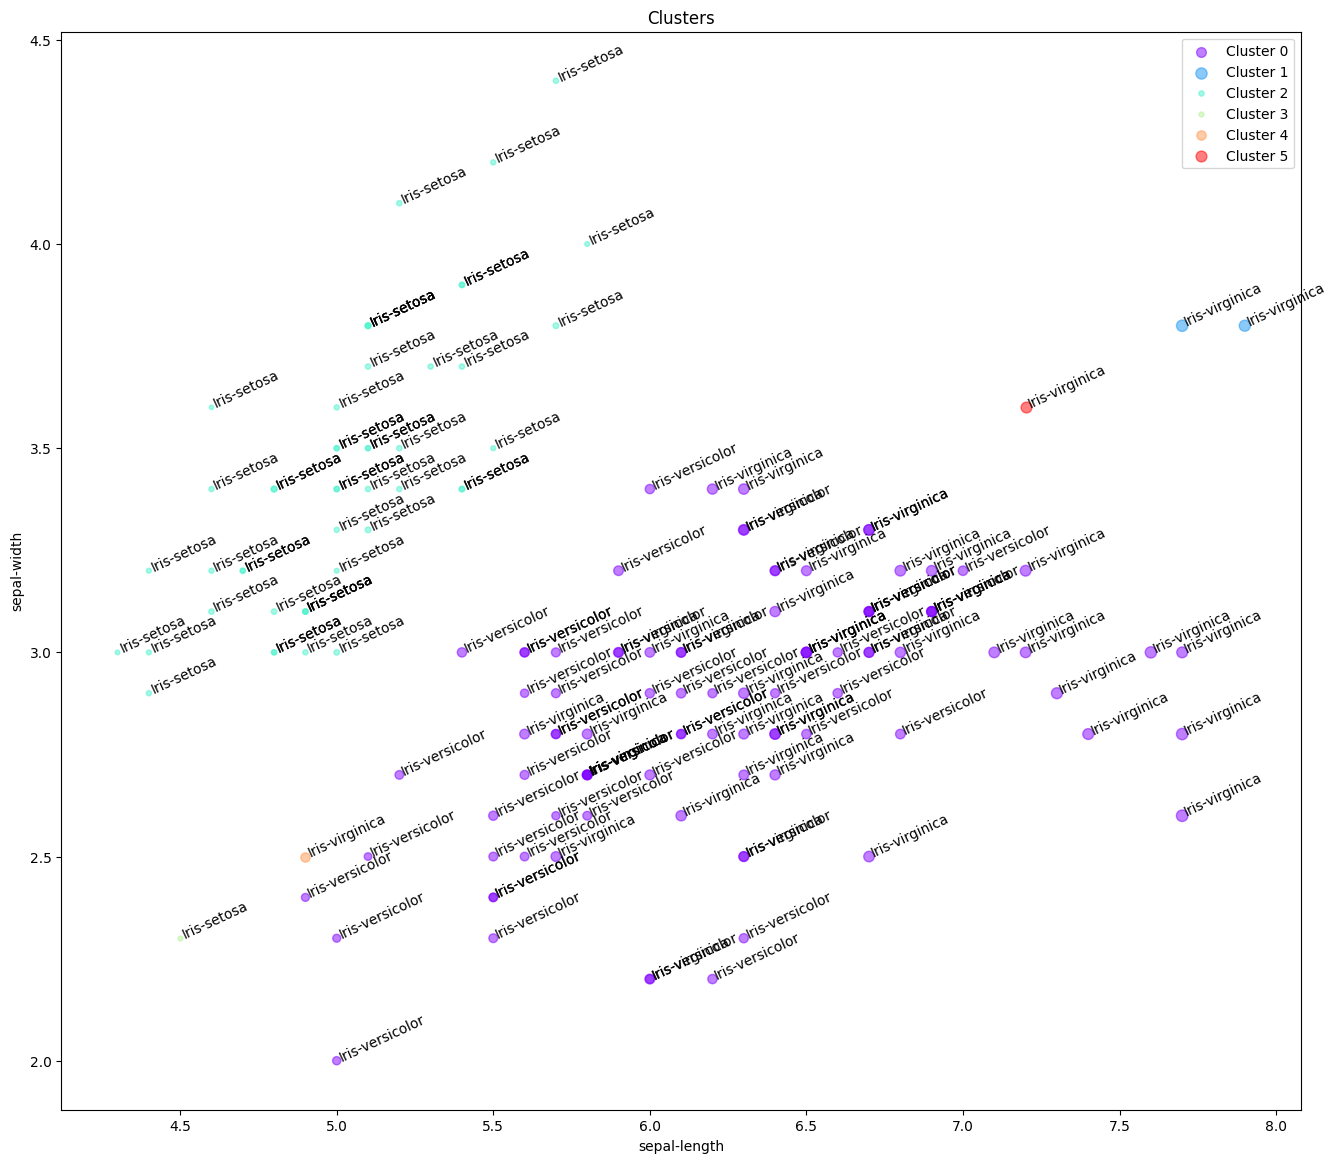

In [31]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset.cluster_ == label]
    for index, row in subset.iterrows():
        plt.text(row['sepal-length'], row['sepal-width'], str(row['class']), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Code di atas membuat visualisasi scatter plot untuk klaster yang dihasilkan dari hasil clustering menggunakan Agglomerative Clustering. Setiap klaster ditandai dengan warna yang berbeda, dan pada setiap titik data, kita menampilkan model mobilnya. Legenda dan label grafik juga disusun untuk memberikan konteks terhadap visualisasi tersebut.

In [32]:
# Menghitung tipe di setiap cluster
dataset.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-versicolor    50
          Iris-virginica     46
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
4         Iris-virginica      1
5         Iris-virginica      1
Name: cluster_, dtype: int64

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung jumlah kelas iris di setiap klaster. Ini memberikan informasi tentang distribusi kelas iris di masing-masing klaster hasil clustering.

In [33]:
# Karakteristik masing-masing cluster
agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()
agg_iris

<ipython-input-33-4c8b9e7cb13a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.558696     2.934783      5.519565     2.019565
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000
5        Iris-virginica       7.200000     3.600000      6.100000     2.500000

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung rata-rata dari beberapa atribut ('sepal-length', 'sepal-width', 'petal-length', 'petal-width') di setiap klaster dan kelas iris. Ini memberikan gambaran karakteristik masing-masing klaster hasil clustering untuk setiap kelas iris.

#####Plotting Dendogram

<ipython-input-34-634b65063aa5>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))


Text(0, 0.5, 'sepal-width')

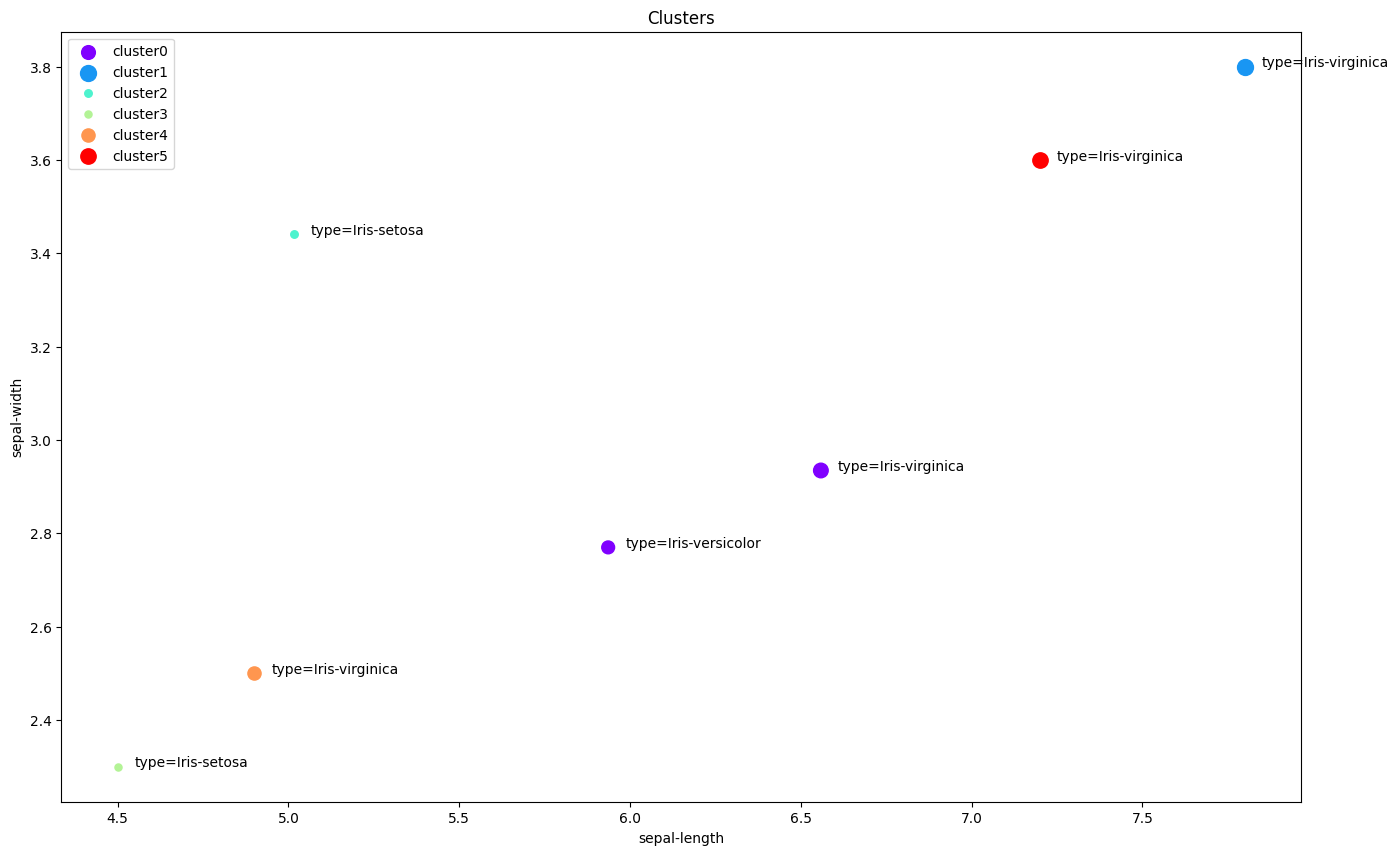

In [34]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i]['sepal-length'] + 0.05, subset.loc[i]['sepal-width'], 'type=' + str(i))
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Visualisasi yang dihasilkan dari code tersebut memperlihatkan bagaimana data pada dataset iris terdistribusi dalam dimensi 'sepal-length' dan 'sepal-width' setelah proses clustering menggunakan single linkage. Beberapa poin penting dari visualisasi ini:

1. **Warna Klaster:**
   - Setiap klaster ditampilkan dengan warna yang berbeda. Warna klaster dihasilkan dari pemetaan ke dalam ruang warna pelangi menggunakan `cm.rainbow`.

2. **Marker dan Ukuran:**
   - Setiap titik data (bunga iris) dalam klaster ditandai dengan marker scatter plot.
   - Ukuran marker (`s`) ditentukan oleh nilai 'petal-length' yang telah diubah skala. Ini dapat memberikan informasi visual tentang karakteristik 'petal-length' untuk setiap titik.

3. **Teks pada Titik Data:**
   - Teks ditambahkan ke setiap titik data, menunjukkan tipe data yang bersesuaian.
   - Teks ini berguna untuk identifikasi dan interpretasi data pada plot.

4. **Legenda:**
   - Legenda ditambahkan untuk menyajikan informasi tentang warna yang mewakili setiap klaster.

5. **Judul dan Label Sumbu:**
   - Grafik dilengkapi dengan judul ("Clusters") dan label sumbu x ("sepal-length") serta label sumbu y ("sepal-width").

Visualisasi ini membantu dalam memahami bagaimana data terorganisir setelah dilakukan clustering dengan menggunakan metode single linkage pada atribut 'sepal-length' dan 'sepal-width'. Klaster yang berbeda tergambar dengan warna yang berbeda, dan pola distribusi dapat memberikan wawasan tentang kemiripan antar data dalam klaster tersebut.

####Average Linkage

In [35]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 1, 4, 1, 1, 1, 1, 2, 1, 4, 5,
       1, 4, 1, 4, 4, 1, 1, 5, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 5,
       1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

Code di atas menggunakan algoritma agglomerative clustering dengan average linkage untuk membentuk 6 klaster dari data yang sudah dinormalisasi (`feature_mtx`). Hasil klaster untuk setiap sampel akan disimpan dalam atribut `labels_` dari objek `AgglomerativeClustering`. Klaster ini dapat digunakan untuk analisis lebih lanjut atau visualisasi hasil clustering.

In [36]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame dataset
dataset['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Code di atas menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame `dataset` yang berisi hasil klaster dari setiap sampel. Dengan menampilkan lima baris pertama dari DataFrame, kita dapat melihat hasil penambahan kolom klaster ini ke dalam data.

#####Scatter Plot

<ipython-input-37-00085a270b61>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)


Text(0, 0.5, 'sepal-width')

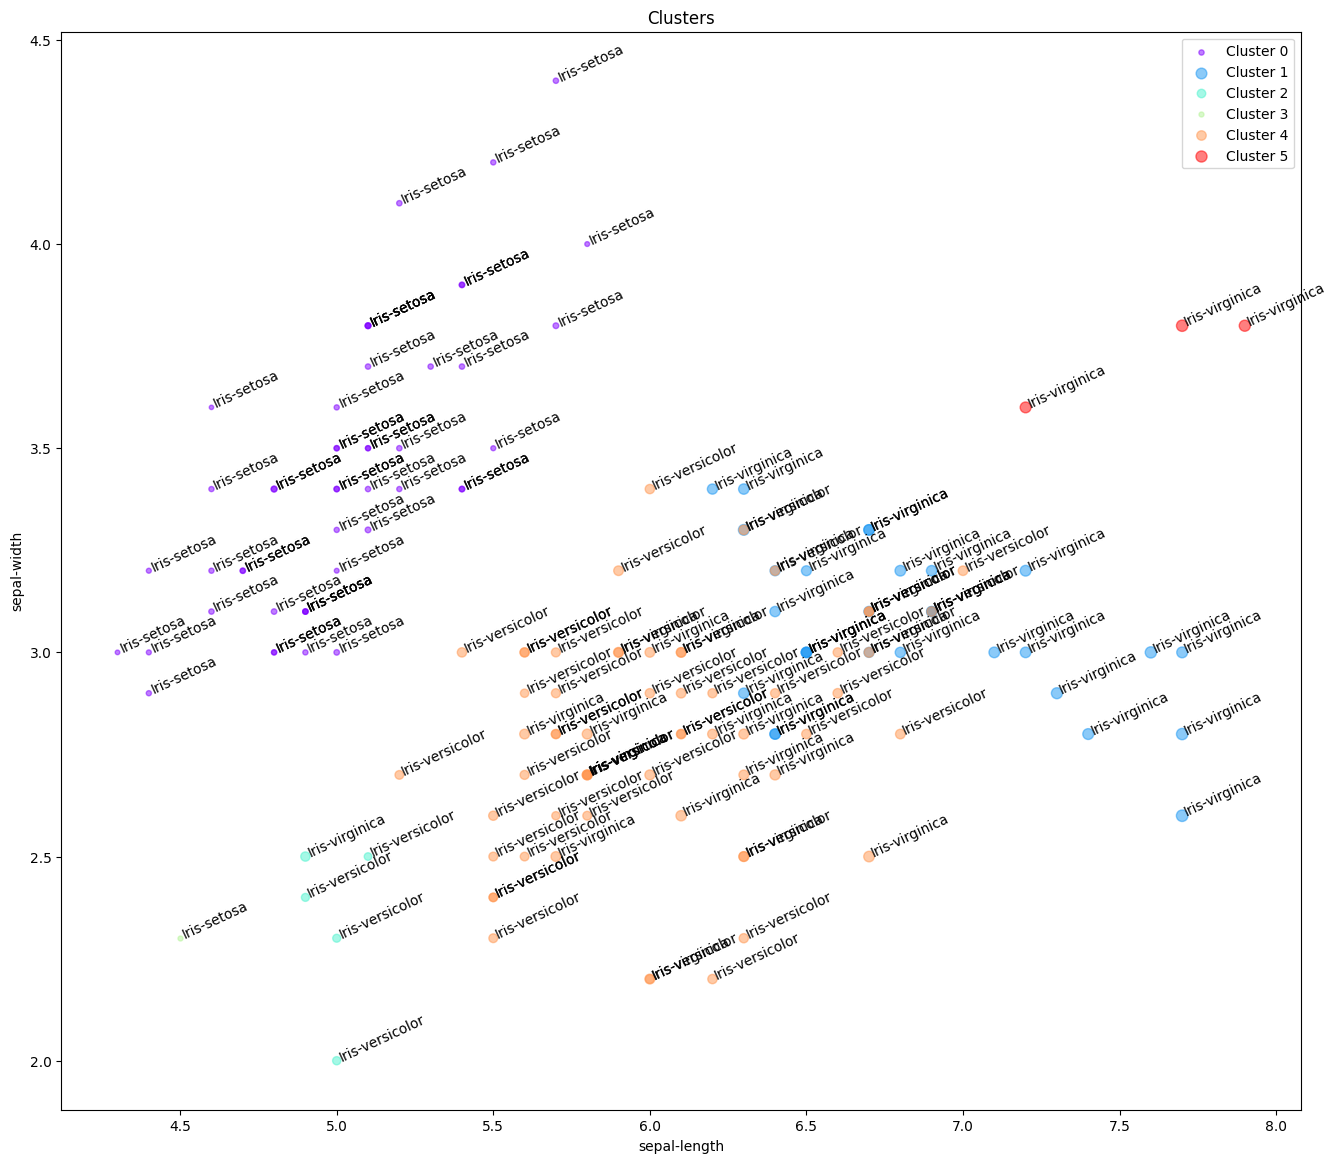

In [37]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset.cluster_ == label]
    for index, row in subset.iterrows():
        plt.text(row['sepal-length'], row['sepal-width'], str(row['class']), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*10, c=color, label='Cluster '+str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Code di atas membuat visualisasi scatter plot untuk klaster yang dihasilkan dari hasil clustering menggunakan Agglomerative Clustering. Setiap klaster ditandai dengan warna yang berbeda, dan pada setiap titik data, kita menampilkan model mobilnya. Legenda dan label grafik juga disusun untuk memberikan konteks terhadap visualisasi tersebut.

In [38]:
# Menghitung tipe di setiap cluster
dataset.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-setosa        49
1         Iris-virginica     30
2         Iris-versicolor     4
          Iris-virginica      1
3         Iris-setosa         1
4         Iris-versicolor    46
          Iris-virginica     16
5         Iris-virginica      3
Name: cluster_, dtype: int64

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung jumlah kelas iris di setiap klaster. Ini memberikan informasi tentang distribusi kelas iris di masing-masing klaster hasil clustering.

In [39]:
# Karakteristik masing-masing cluster
agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()
agg_iris

<ipython-input-39-4c8b9e7cb13a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = dataset.groupby(['cluster_', 'class'])['sepal-length', 'sepal-width', 'petal-length', 'petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-setosa          5.016327     3.440816      1.467347     0.242857
1        Iris-virginica       6.823333     3.056667      5.746667     2.123333
2        Iris-versicolor      5.000000     2.300000      3.275000     1.025000
         Iris-virginica       4.900000     2.500000      4.500000     1.700000
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-versicolor      6.017391     2.810870      4.345652     1.352174
         Iris-virginica       6.062500     2.706250      5.093750     1.825000
5        Iris-virginica       7.600000     3.733333      6.400000     2.233333

Code di atas menggunakan metode `groupby` pada DataFrame untuk menghitung rata-rata dari beberapa atribut ('sepal-length', 'sepal-width', 'petal-length', 'petal-width') di setiap klaster dan kelas iris. Ini memberikan gambaran karakteristik masing-masing klaster hasil clustering untuk setiap kelas iris.

#####Plotting Dendogram

<ipython-input-40-634b65063aa5>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))


Text(0, 0.5, 'sepal-width')

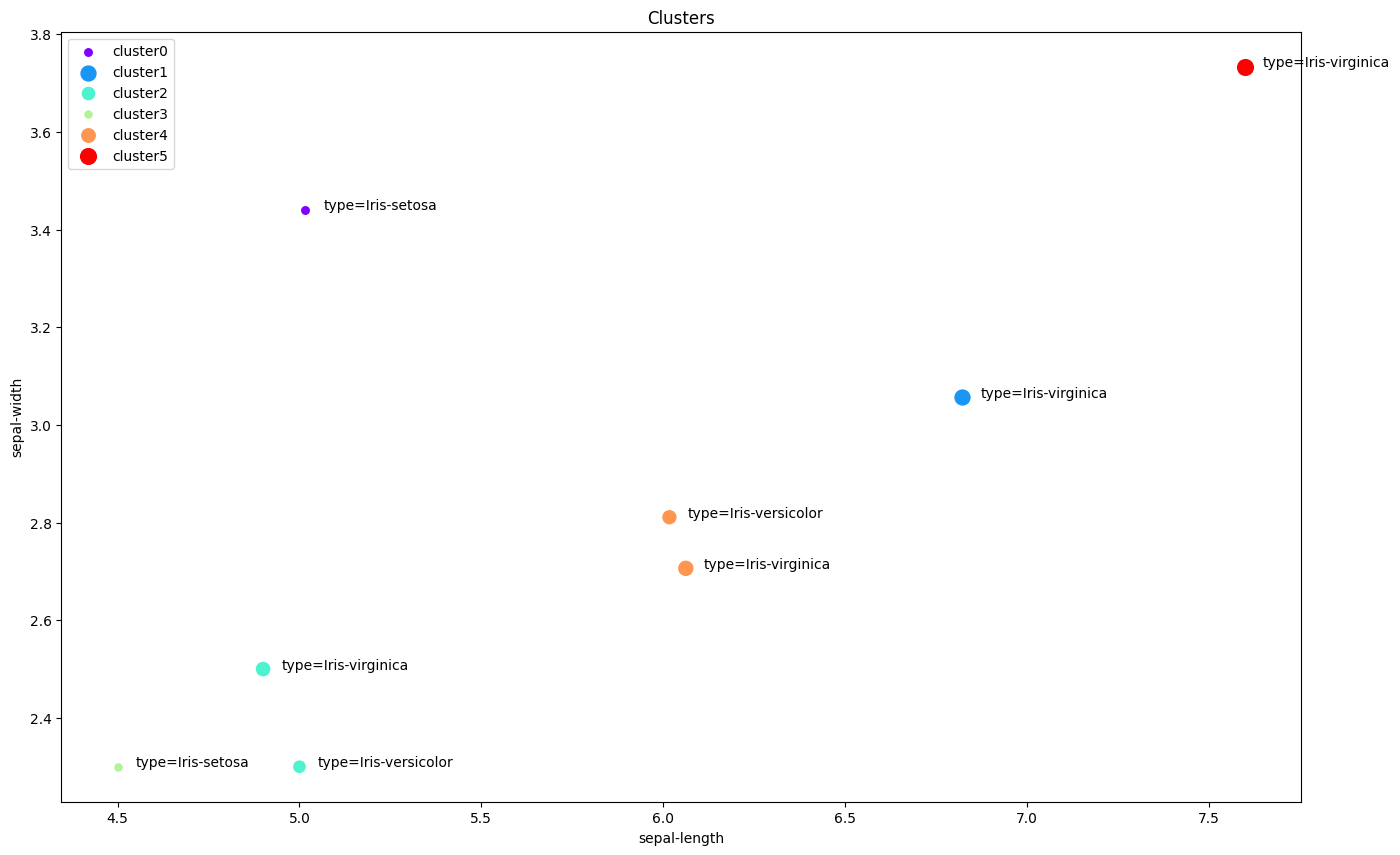

In [40]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i]['sepal-length'] + 0.05, subset.loc[i]['sepal-width'], 'type=' + str(i))
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=subset['petal-length']*20, c=color, label='cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Visualisasi yang dihasilkan dari code tersebut memperlihatkan bagaimana data pada dataset iris terdistribusi dalam dimensi 'sepal-length' dan 'sepal-width' setelah proses clustering menggunakan average linkage. Beberapa poin penting dari visualisasi ini:

1. **Warna Klaster:**
   - Setiap klaster ditampilkan dengan warna yang berbeda. Warna klaster dihasilkan dari pemetaan ke dalam ruang warna pelangi menggunakan `cm.rainbow`.

2. **Marker dan Ukuran:**
   - Setiap titik data (bunga iris) dalam klaster ditandai dengan marker scatter plot.
   - Ukuran marker (`s`) ditentukan oleh nilai 'petal-length' yang telah diubah skala. Ini dapat memberikan informasi visual tentang karakteristik 'petal-length' untuk setiap titik.

3. **Teks pada Titik Data:**
   - Teks ditambahkan ke setiap titik data, menunjukkan tipe data yang bersesuaian.
   - Teks ini berguna untuk identifikasi dan interpretasi data pada plot.

4. **Legenda:**
   - Legenda ditambahkan untuk menyajikan informasi tentang warna yang mewakili setiap klaster.

5. **Judul dan Label Sumbu:**
   - Grafik dilengkapi dengan judul ("Clusters") dan label sumbu x ("sepal-length") serta label sumbu y ("sepal-width").

Visualisasi ini membantu dalam memahami bagaimana data terorganisir setelah dilakukan clustering dengan menggunakan metode average linkage pada atribut 'sepal-length' dan 'sepal-width'. Klaster yang berbeda tergambar dengan warna yang berbeda, dan pola distribusi dapat memberikan wawasan tentang kemiripan antar data dalam klaster tersebut.

###Kesimpulan

Kesimpulan dari agglomerative clustering menggunakan scipy dan scikit-learn dengan tiga metode linkage (single linkage, average linkage, dan complete linkage) untuk dataset iris:

1. **Single Linkage:**
   - **Visualisasi Dendrogram:** Dendrogram single linkage menggambarkan pengelompokan secara hierarkis dengan menghubungkan dua klaster yang memiliki jarak terpendek antara satu titik di klaster satu dengan satu titik di klaster lain.
   - **Hasil Klastering:** Hasil clustering dengan single linkage dapat menghasilkan klaster yang memiliki bentuk yang membentang panjang dan kurang terdefinisi dengan baik.

2. **Average Linkage:**
   - **Visualisasi Dendrogram:** Dendrogram average linkage menggambarkan pengelompokan dengan menghitung rata-rata jarak antara semua pasangan titik di dua klaster yang berbeda.
   - **Hasil Klastering:** Average linkage dapat menghasilkan klaster yang lebih seimbang dan berbentuk lebih bundar daripada single linkage.

3. **Complete Linkage:**
   - **Visualisasi Dendrogram:** Dendrogram complete linkage menggambarkan pengelompokan dengan menghubungkan dua klaster yang memiliki jarak terjauh antara satu titik di klaster satu dengan satu titik di klaster lain.
   - **Hasil Klastering:** Complete linkage dapat menghasilkan klaster yang lebih terdefinisi dan berbentuk lebih padat, tetapi dapat juga membentuk klaster yang lebih kecil.

4. **Pemilihan Metode Linkage:**
   - Pemilihan metode linkage harus didasarkan pada karakteristik data dan tujuan analisis. Single linkage cenderung menghasilkan klaster yang panjang dan tidak terdefinisi dengan baik, sementara average linkage dan complete linkage dapat menghasilkan klaster yang lebih seimbang dan terdefinisi dengan baik.

5. **Kesimpulan Umum:**
   - Agglomerative clustering dengan metode linkage yang berbeda dapat memberikan hasil yang berbeda dalam hal bentuk dan ukuran klaster.
   - Analisis visual dendrogram dapat membantu dalam pemahaman struktur hierarkis dan memilih jumlah klaster yang tepat.
   - Pemilihan metode clustering harus disesuaikan dengan karakteristik data dan tujuan analisis yang diinginkan.